<a href="https://colab.research.google.com/github/Misfit911/SentimentFlow/blob/data-modelling/sentimentflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Business Understanding**

### Overview

SentimentFlow aims to address a real-world problem related to understanding public sentiment towards Apple and Google products on Twitter. The stakeholders include companies, marketing teams, and decision-makers who want to gauge public opinion and make informed strategic decisions based on social media sentiment.

### Problem Statement

The problem is to accurately classify the sentiment of tweets related to Apple and Google products. We want to determine whether a tweet expresses a positive, negative, or neutral sentiment. This classification can help companies understand customer satisfaction, identify potential issues, and tailor their responses accordingly.

### Stakeholders

1. **Companies (Apple and Google):** These organizations are directly impacted by public sentiment. They want to monitor how their products are perceived and identify areas for improvement.

2. **Marketing Teams:** Marketing teams can use sentiment analysis to adjust their campaigns, respond to negative feedback, and highlight positive aspects of their products.

3. **Decision-Makers:** Executives and managers need insights into public sentiment to make informed decisions about product development, customer support, and brand reputation.

### Value Proposition

By accurately classifying tweets, our NLP model can provide actionable insights to stakeholders. For example:
- Identifying negative sentiment can help companies address issues promptly.
- Recognizing positive sentiment can guide marketing efforts and reinforce successful strategies.
- Understanding neutral sentiment can provide context and balance.

### Objectives

Main Objective

> To develop a NLP (Natural Language Processing) multiclass classification model for sentiment analysis, aim to achieve a recall score of 85% and an accuracy of 90%. The model should categorize sentiments into three classes: Positive, Negative, and Neutral.

Specific Objectives

* To idenitfy the most common words used in the dataset using Word cloud.

* To confirm the most common words that are positively and negatively tagged.

* To recognize the products that have been opined by the users.

* To spot the distribution of the sentiments.

### Conclusion

Our NLP model will contribute valuable insights to the real-world problem of understanding Twitter sentiment about Apple and Google products. Stakeholders can leverage this information to enhance their decision-making processes and improve overall customer satisfaction.

## 2. **Data Understanding**

### Data Sources
The dataset originates from CrowdFlower via data.world. Contributors evaluated tweets related to various brands and products. Specifically:
- Each tweet was labeled as expressing positive, negative, or no emotion toward a brand or product.
- If emotion was expressed, contributors specified which brand or product was the target.

### Suitability of Data
Here's why this dataset is suitable for our project:
1. **Relevance:** The data directly aligns with our business problem of understanding Twitter sentiment for Apple and Google products.
2. **Real-World Context:** The tweets represent actual user opinions, making the problem relevant in practice.
3. **Multiclass Labels:** We can build both binary (positive/negative) and multiclass (positive/negative/neutral) classifiers using this data.

### Dataset Size
The dataset contains over 9,000 labeled tweets. We'll explore its features to gain insights.

### Descriptive Statistics
- **tweet_text:** The content of each tweet.
- **is_there_an_emotion_directed_at_a_brand_or_product:** No emotion toward brand or product, Positive emotion, Negative emotion, I can't tell
- **emotion_in_tweet_is_directed_at:** The brand or product mentioned in the tweet.

### Feature Inclusion
Tweet text is the primary feature. The emotion label and target brand/product are essential for classification.

### Limitations
- **Label Noise:** Human raters' subjectivity may introduce noise.
- **Imbalanced Classes:** We'll address class imbalance during modeling.
- **Contextual Challenges:** Tweets are often short and context-dependent.
- **Incomplete & Missing Data:** Could affect the overall performance of the models.

## 3. **Data Loading**

In [101]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


# Download required NLTK data
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# wordCloud
from wordcloud import WordCloud

### ***Class Creation***

In [103]:
class DataUnderstanding():
    """Class that gives the data understanding of a dataset"""
    def __init__(self, data='None'):
        """Initialisation"""
        self.df = data

    def load_data(self, path):
        """Loading the data"""
        if self.df == 'None':
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df

    def understanding(self):
        # Info
        print("""INFO""")
        print("-"*4)
        self.df.info()

        # Shape
        print("""\n\nSHAPE""")
        print("-"*5)
        print(f"Records in dataset are {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-"*6)
        print(f"Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-"*12)
        for col in self.df.columns:
            print(f"Column *{col}* has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in the *{col}* include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("""\nMISSING VALUES""")
        print("-"*15)
        for col in self.df.columns:
            print(f"Column *{col}* has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("""\n\nDUPLICATE VALUES""")
        print("-"*16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")

### ***Load the data set***

In [104]:
data = DataUnderstanding()
df = data.load_data(path="judge_tweet_product_company.csv")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [105]:
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


SHAPE
-----
Records in dataset are 9093 with 3 columns.


COLUMNS
------
Columns in the dataset are:
- tweet_text
- emotion_in_tweet_is_directed_at
- is_there_an_emotion_directed_at_a_brand_or_product


UNIQUE VALUES
------------
Column *tweet_text* has 9065 unique values

Column *emotion_in_tweet_is_directed_at* has 9 unique values
Top unique values in the *emotion_in_tweet_is_directed_at* include:
- iPad
- Apple
- iPad or iPhone App
-

***
Comments:
- All the columns are in the correct data types.

- The columns will need to be renamed.

- Features with missing values should be renamed from NaN.

- Duplicate records should be dropped.

- All records with the target as "I can't tell" should be dropped.

- Corrupted records should be removed.

- Rename values in the *is_there_an_emotion_directed_at_a_brand_or_product* where the value is 'No emotion toward brand or product' to 'Neutral Emotion'
***

## 4.0. Data Cleaning

### 4.1. Validity

#### 4.1.1. Corrupted Records in the *tweet_text* Column

The data seems to be corrupted in some records. To correct this issue, we create a function that can find these corrupted records, and returns their indexes. We use this index to remove the record from the working dataframe.

In [106]:
# A function targeting corrupted records
def is_corrupted(tweet):
    """This func returns the index of any record that is corrupted"""
    corrupted_cols = []
    for key, text in enumerate(tweet):
        if any(ord(char) > 127 for char in str(text)) == True:
            corrupted_cols.append(key)
    return corrupted_cols

In [107]:
# Applying the is_corrupted function to find the indexes of the corrupted records
corrupted_records_idx = is_corrupted(df['tweet_text'])

In [108]:
# Test to check if the function worked as intended
df.loc[corrupted_records_idx]['tweet_text'].values[0]

'@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW'

In [109]:
# Drop these records
df.drop(index=corrupted_records_idx, inplace=True)

In [110]:
# Test to ensure there are no corrupted records left
is_corrupted(df['tweet_text'])

[]

#### 4.1.2. Drop Records in the *is_there_an_emotion_directed_at_a_brand_or_product* column where the value is "I can't tell"

In [111]:
# Identification of the record
bad_reaction_idx = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"].index

# Drop the columns
df.drop(index = bad_reaction_idx, inplace=True)

# Test
df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


#### 4.1.3.Replace Fields in the *is_there_an_emotion_directed_at_a_brand_or_product* column where the value is "No emotion toward brand or product" to "Neutral emotion"

In [112]:
# Identification of the record
neutral_reaction_idx = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] ==\
                              "No emotion toward brand or product"].index

# Replace the values
df.loc[neutral_reaction_idx, 'is_there_an_emotion_directed_at_a_brand_or_product'] = "Neutral emotion"

# Test
df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "No emotion toward brand or product"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


### 4.2. Completeness

#### 4.2.1. Drop Missing Values in the *tweet_text* column

In [113]:
tweet_missing = df[df['tweet_text'].isnull() == True].index
df.loc[tweet_missing]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,Neutral emotion


In [114]:
# Drop the record
df.drop(index=tweet_missing, inplace=True)

In [115]:
# Check
df[df['tweet_text'].isnull() == True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


#### 4.2.2. Fill Missing Values in the *emotion_in_tweet_is_directed_at* column

In [116]:
# Find the records with missing values in the 2nd column
df[df['emotion_in_tweet_is_directed_at'].isnull() == True].shape[0]

5331

In [117]:
# List of unique products/ services
products = list(df.emotion_in_tweet_is_directed_at.unique())
products.remove(np.nan) # Removes any np.nan items

def find_product(tweet):
    """This func takes in a tweet and returns the product talked about in the
    tweet; used to fill in the emotion_in_tweet_is_directed_at column"""
    for product in products:
        if str(product) in tweet or str(product).upper() in tweet \
            or  str(product).lower() in tweet or str(product).title() in tweet:
            return product

# Applying the function to find the index of records with missing values in the 2nd column
missing_products_idx = df[df['emotion_in_tweet_is_directed_at'].isnull() == True].index

In [118]:
# Replace the field where there are missing values in the emotion_in_tweet_is_directed_at column
df.loc[missing_products_idx, 'emotion_in_tweet_is_directed_at'] = df.loc[missing_products_idx, 'tweet_text']\
                                                                        .apply(lambda x: find_product(x))

In [120]:
# In case any field was not captured by our function, we can change it to 'None'
none_index = df[df['emotion_in_tweet_is_directed_at'].isnull()].index
df.loc[none_index, 'emotion_in_tweet_is_directed_at'] = 'None'
# df.loc[none_index]

In [121]:
# Check
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               2273
Google                             1984
Apple                              1269
iPhone                             1093
None                                720
iPad or iPhone App                  448
Android                             284
Other Google product or service     278
Android App                          77
Other Apple product or service       33
Name: count, dtype: int64

In [122]:
# Number of values in the column are the same as the length of the data
np.sum(df['emotion_in_tweet_is_directed_at'].value_counts().values) == df.shape[0]

True

##### Observation
> * Noting that the missing data consists of over 5000 rows, this represent a significant proportion of the data if we dropped this data.

> * To counter this problem, knowing that there are limited observable products in the 2nd column, we can read each tweet and, find and replace the missing value with the relevant product the tweett talks about.

> * In the end, we were able to assign all tweets to a product and only 720 were not talking about a product explicitly.

### 4.3 Consistency

#### 4.3.1. Drop the Duplicates

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
# Check
df.duplicated().sum()

0

### 4.4. Uniformity

#### 4.4.1. Renaming the columns

In [125]:
# Change the column names
df.rename(columns={'tweet_text': "tweet",
                  'emotion_in_tweet_is_directed_at':"product",
                  'is_there_an_emotion_directed_at_a_brand_or_product': "emotion"},
         inplace=True)

In [126]:
# Check
df.columns

Index(['tweet', 'product', 'emotion'], dtype='object')

#### 4.4.2. Reset the Index of the dataframe

In [127]:
# Reset the index
df.reset_index(inplace=True)
# Drop the old index column
df.drop(labels='index', axis=1, inplace=True)
df

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8434,"@mention Yup, but I don't have a third app yet...",Android,Neutral emotion
8435,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8436,"Wave, buzz... RT @mention We interrupt your re...",Google,Neutral emotion
8437,"Google's Zeiger, a physician never reported po...",Google,Neutral emotion


### 4.5. Conclusion

To ensure that the cleaning process worked efficiently, we can access the DataUnderstanding class to perform final checks before proceeding to the next section.

In [128]:
DataUnderstanding(data=df).understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    8439 non-null   object
 1   product  8439 non-null   object
 2   emotion  8439 non-null   object
dtypes: object(3)
memory usage: 197.9+ KB


SHAPE
-----
Records in dataset are 8439 with 3 columns.


COLUMNS
------
Columns in the dataset are:
- tweet
- product
- emotion


UNIQUE VALUES
------------
Column *tweet* has 8434 unique values

Column *product* has 10 unique values
Top unique values in the *product* include:
- iPad
- Google
- Apple
- iPhone
- None
- iPad or iPhone App
- Android
- Other Google product or service
- Android App
- Other Apple product or service

Column *emotion* has 3 unique values
Top unique values in the *emotion* include:
- Neutral emotion
- Positive emotion
- Negative emotion


MISSING VALUES
---------------
Column *tweet* has 0 missing values.
Column *product*

##### Observations
The data cleaning worked efficiently.
***

## 5.0. Data Visualisations

In [129]:
def plot_bar(feature, plot='bar'):
    """This func returns a bar or a barh plot"""
    if plot == 'bar':
        labels = df[feature].value_counts().index
        values = df[feature].value_counts().values
        plt.bar( x=labels,height=values)
        plt.ylabel("Count")
        plt.xlabel("Categories")
    else:
        labels = df[feature].value_counts(ascending=True).index
        values = df[feature].value_counts(ascending=True).values
        plt.barh(width=values, y=labels)
        plt.xlabel("Count")
        plt.ylabel("Categories")
    plt.title(f"Distribution of the {feature.title()} feature");


### 5.1. Distribution of the *emotion* feature

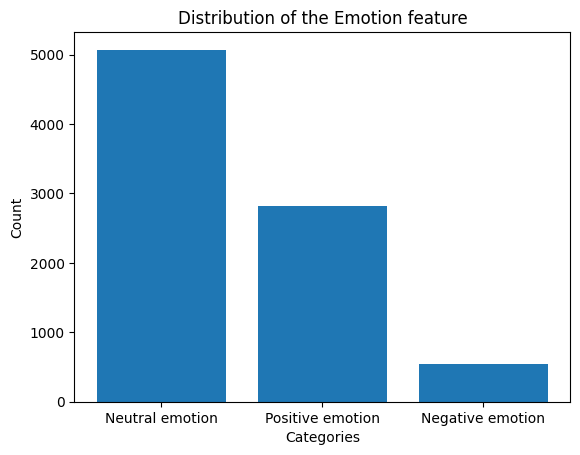

In [ ]:
plot_bar('emotion')

##### Observation
The distribution shows a huge class imbalance between categories. The Neutral Emotion category holds over 50% of the data.

### 5.2. Distribution of the *product* feature

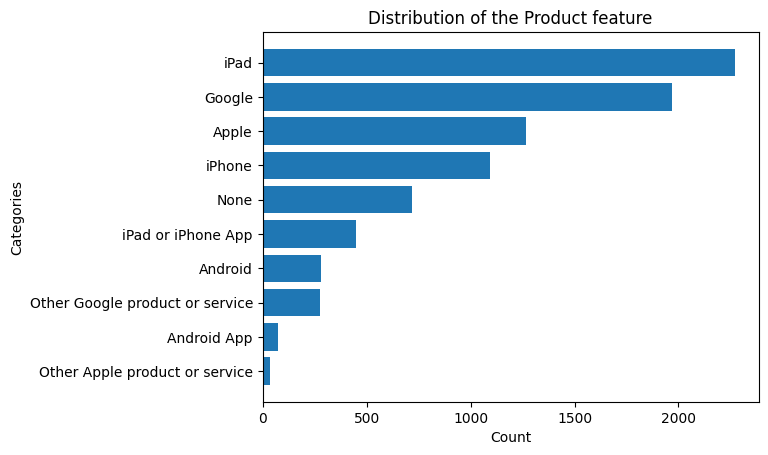

In [ ]:
plot_bar('product', plot='barh')

##### Observation
The data reveals there was a lot of sentiments concerning the iPad in the period, followed closely by the Google and Apple company.

The data has a 'None' category meaning that it did not concern the Apple of Google products originally set out at the start of the project.

## 6.0 **Text Preprocessing**

In [130]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english') + ['sxsw', 'sxswi', 'link', 'rt'])
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]
    return tokens

# Apply the clean_text function to the 'tweet' column
df['lemmatized_tweet'] = df['tweet'].apply(lambda x: lemmatize_tweet(x))

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.

    Parameters:
    tokens (list of str): A list of tokens to be joined.

    Returns:
    str: The tokens joined into a single string separated by spaces.
    """
    return " ".join(tokens)

df['clean_tweet'] = df['lemmatized_tweet'].apply(lambda x: join_text(x))

# Print the cleaned tweets
df.head()


,tweet,product,emotion,lemmatized_tweet,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, riseaustin, dead, need,...",iphone hr tweeting riseaustin dead need upgrad...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, ipad, also, sale]",wait ipad also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph...",hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, mayer, google, tim, oreill...",great stuff fri mayer google tim oreilly tech ...


### ***Visual for Lemmatized Tweets***

In [131]:
def plot_fdist(sentiment=None, title="Frequency Distribution of All Words", df=df):
    """
    This func creates a Frequency Distribution plot depending on the sentiment chosen
    """

    if sentiment == None:
        lemmatized_tweet = df['lemmatized_tweet']

        # Flatten the list
        flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

    elif sentiment != None:
        lemmatized_tweet = df[df['emotion'] == sentiment]['lemmatized_tweet']

        # Flatten the list
        flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

    # Create the frequency distribution
    fdist = FreqDist(flattened_lemmatized_tweet)

    # Plot the frequency distribution
    plt.figure(figsize=(10,6))
    plt.title(title, fontsize=14)
    fdist.plot(30);

#### Frequency Distribution of Lemmatized words

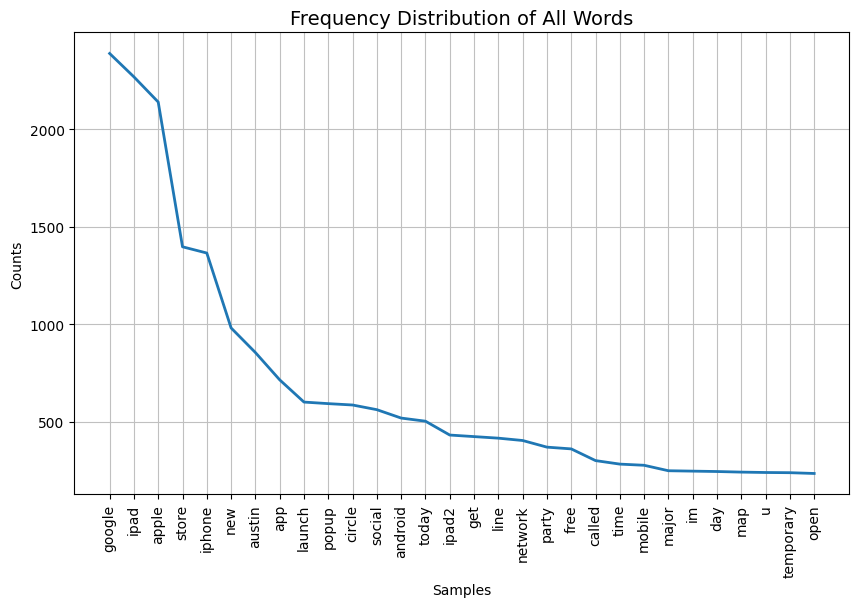

In [132]:
plot_fdist()

**Observation**
> With respect to all the data, the words 'google', 'apple', 'ipad' and 'store' appeared more frequently than all other words.
***

#### Frequency Distribution of Lemmatized words categorized as Neutral Emotion

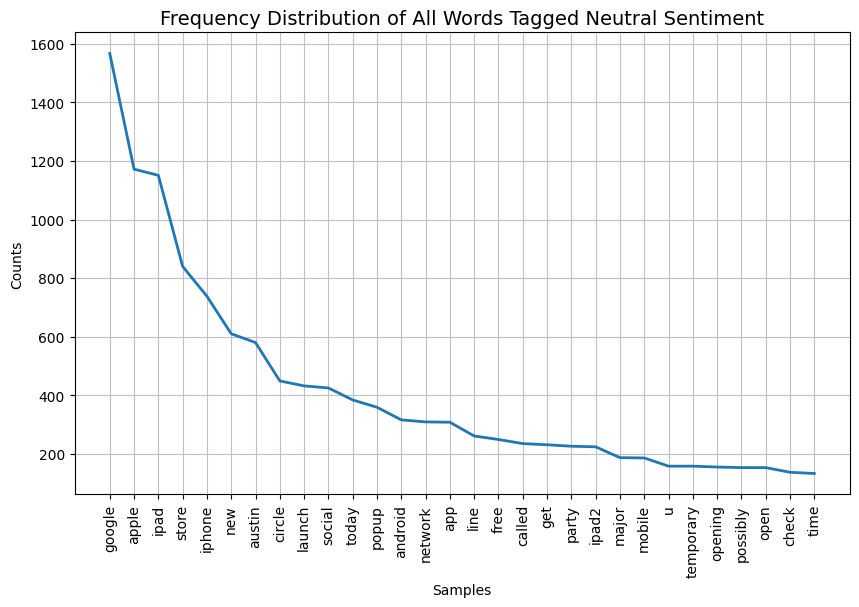

In [133]:
plot_fdist(sentiment="Neutral emotion", title="Frequency Distribution of All Words Tagged Neutral Sentiment")

**Observation**
> With respect to all the data categorised as *'neutral'*, the words 'google', 'apple', 'ipad' and 'store' appeared more frequently than all other words.

> This confirms the class imbalance in the dataset.
***

#### Frequency Distribution of Lemmatized words categorized as Positive Emotion

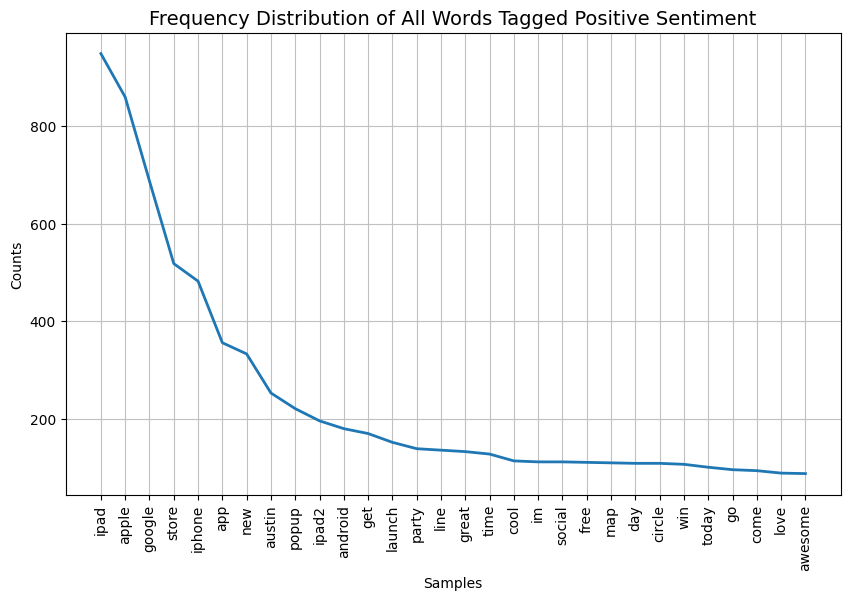

In [134]:
plot_fdist(sentiment="Positive emotion", title="Frequency Distribution of All Words Tagged Positive Sentiment")

**Observation**
> With respect to all the data categorised as *'positive'*, the words 'ipad', 'apple', 'google' and 'store' appeared more frequently than all other words.

> Other key positive words introduced in this section include "awesome", "love", "win", "cool", "great", "party"

> But were less than the counts recorded in the Neutral Frequency Distributions.
***

#### Frequency Distribution of Lemmatized words categorized as Negative Emotion

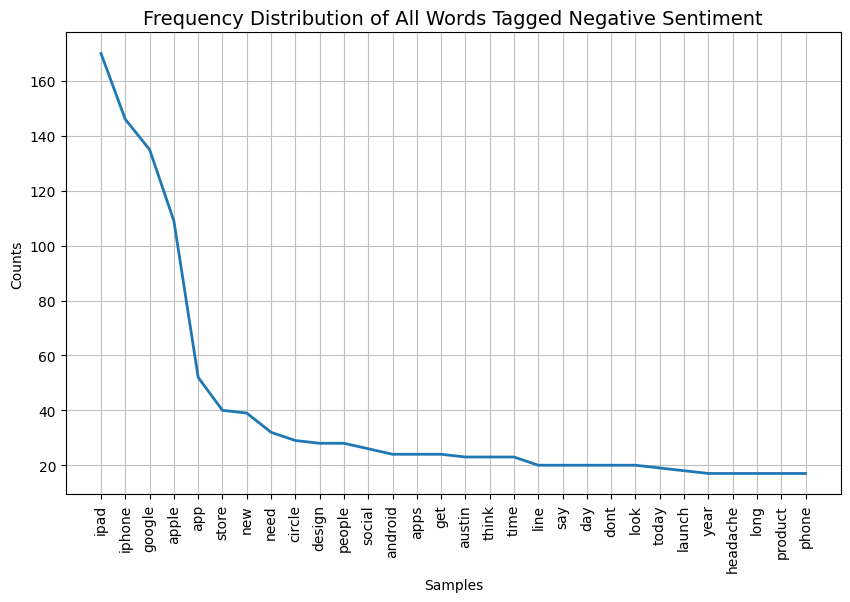

In [135]:
plot_fdist(sentiment="Negative emotion", title="Frequency Distribution of All Words Tagged Negative Sentiment")

**Observation**
> With respect to all the data categorised as *'negative'*, the words 'ipad', 'iphone', 'google' and 'apple' appeared more frequently than all other words.
> But were less than the counts recorded in the Neutral Frequency Distributions.
***

### ***Creating Bigrams***

Analyzing bigrams improves context understanding by considering pairs of words together, which helps in understanding phrases that might have specific meanings different from their individual words.

In [136]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Alias for BigramAssocMeasures
bigram_measures = BigramAssocMeasures()

In [137]:
def bigram_plots(sentiment=None, title="Bigram of The Data - All Sentiments", df=df, items=20):
    """
    This function returns a horizontal plot of the highest scored bigrams in the dataset
    """
    if sentiment == None:
        lemmatized_tweet = df['lemmatized_tweet']

        # Flatten the list
        flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

    elif sentiment != None:
        lemmatized_tweet = df[df['emotion'] == sentiment]['lemmatized_tweet']

        # Flatten the list
        flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

    # Create BigramCollocationFinder
    finder = BigramCollocationFinder.from_words(flattened_lemmatized_tweet)

    # Score bigrams by raw frequency
    scored = finder.score_ngrams(bigram_measures.raw_freq)

    # Display the 20 most common bigrams
#     for bigram, score in scored[:20]:
#         print(bigram, score)

    # Order the bigrams
    scores = sorted(scored[:items], key=lambda x: x[1])

    # labels and width
    labels, score = [b[0] + " " + b[1] for b, _ in scores], [score for _, score in scores]

    # Plot
    plt.figure(figsize=(10,6))
    plt.title(title, fontsize=14)
    plt.ylabel("Bigrams")
    plt.xlabel("Scores")
    plt.barh(y=labels, width=score);

#### Bigrams - All data

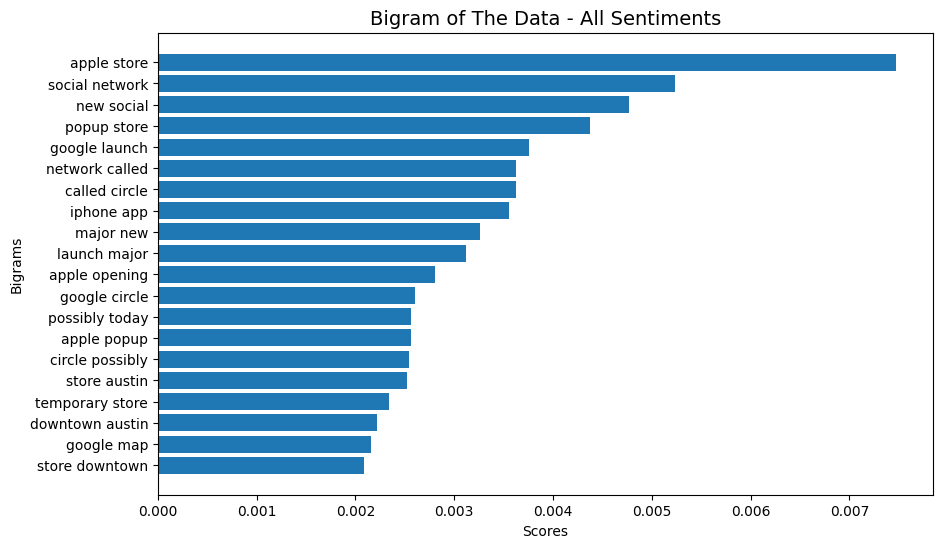

In [138]:
bigram_plots()

**Observation**
> - "apple store", "social network" and "new social" had the highest scores with respect to all the data available.
***

#### Bigrams - Neutral data

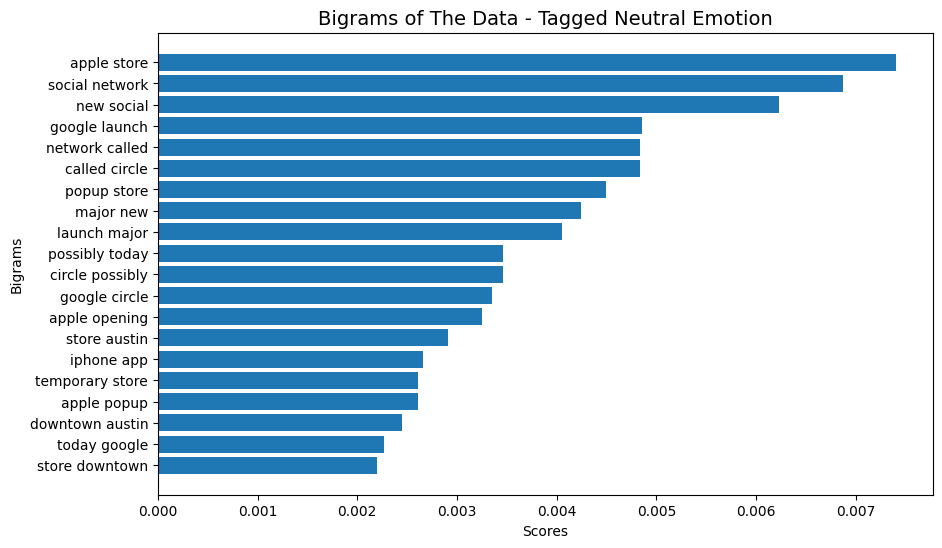

In [139]:
bigram_plots(sentiment='Neutral emotion', title='Bigrams of The Data - Tagged Neutral Emotion')

**Observation**
> - "apple store", "social network" and "new social" had the highest scores with respect to all the data categorised as *neutral*.
***
#### Bigrams - Positive Emotion

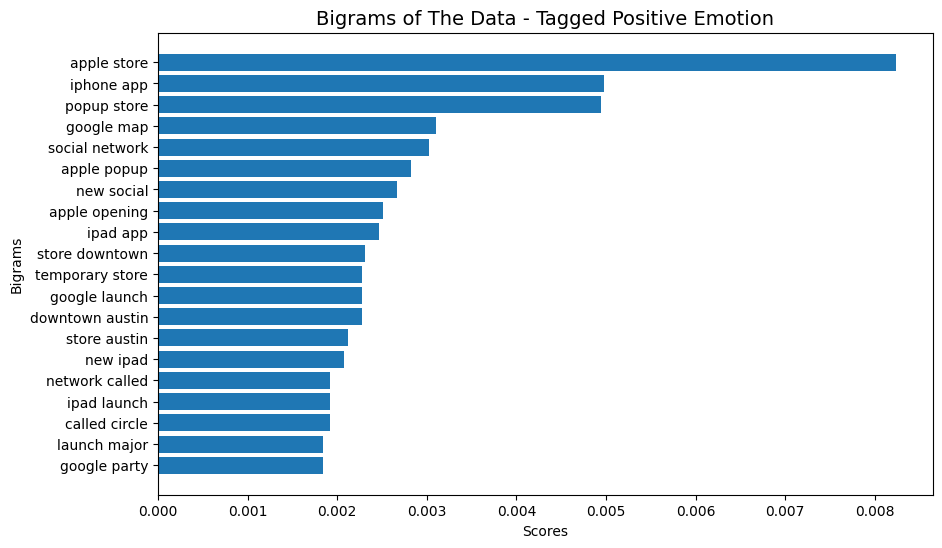

In [140]:
bigram_plots(sentiment='Positive emotion', title='Bigrams of The Data - Tagged Positive Emotion')

**Observation**
> - "apple store", "iphone app" and "popup store" had the highest scores with respect to all the data categorised as *positive*.
***
#### Bigrams - Negative Emotion

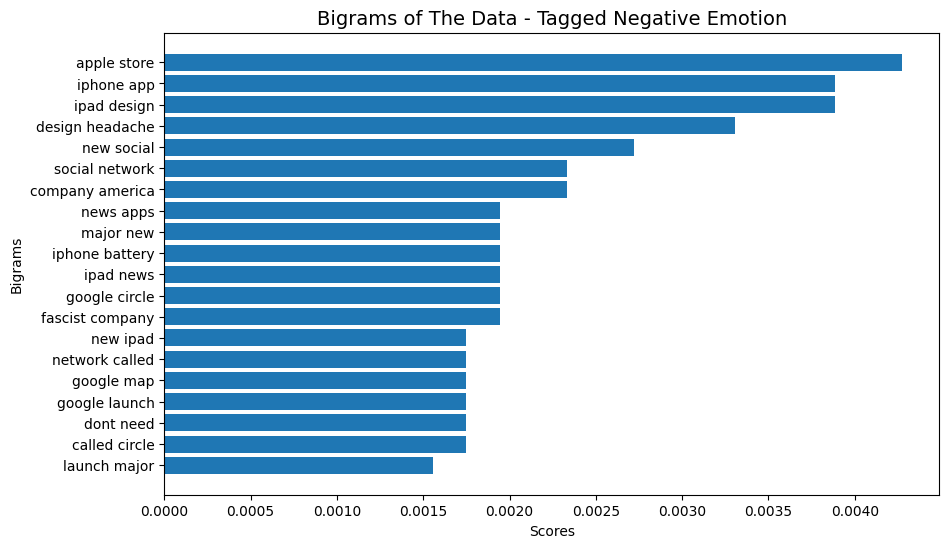

In [141]:
bigram_plots(sentiment='Negative emotion', title='Bigrams of The Data - Tagged Negative Emotion')

**Observation**
> - "apple store", "iphone app" and "ipad design" had the highest scores with respect to all the data categorised as *negative*.
***

### ***Word Cloud Visual***

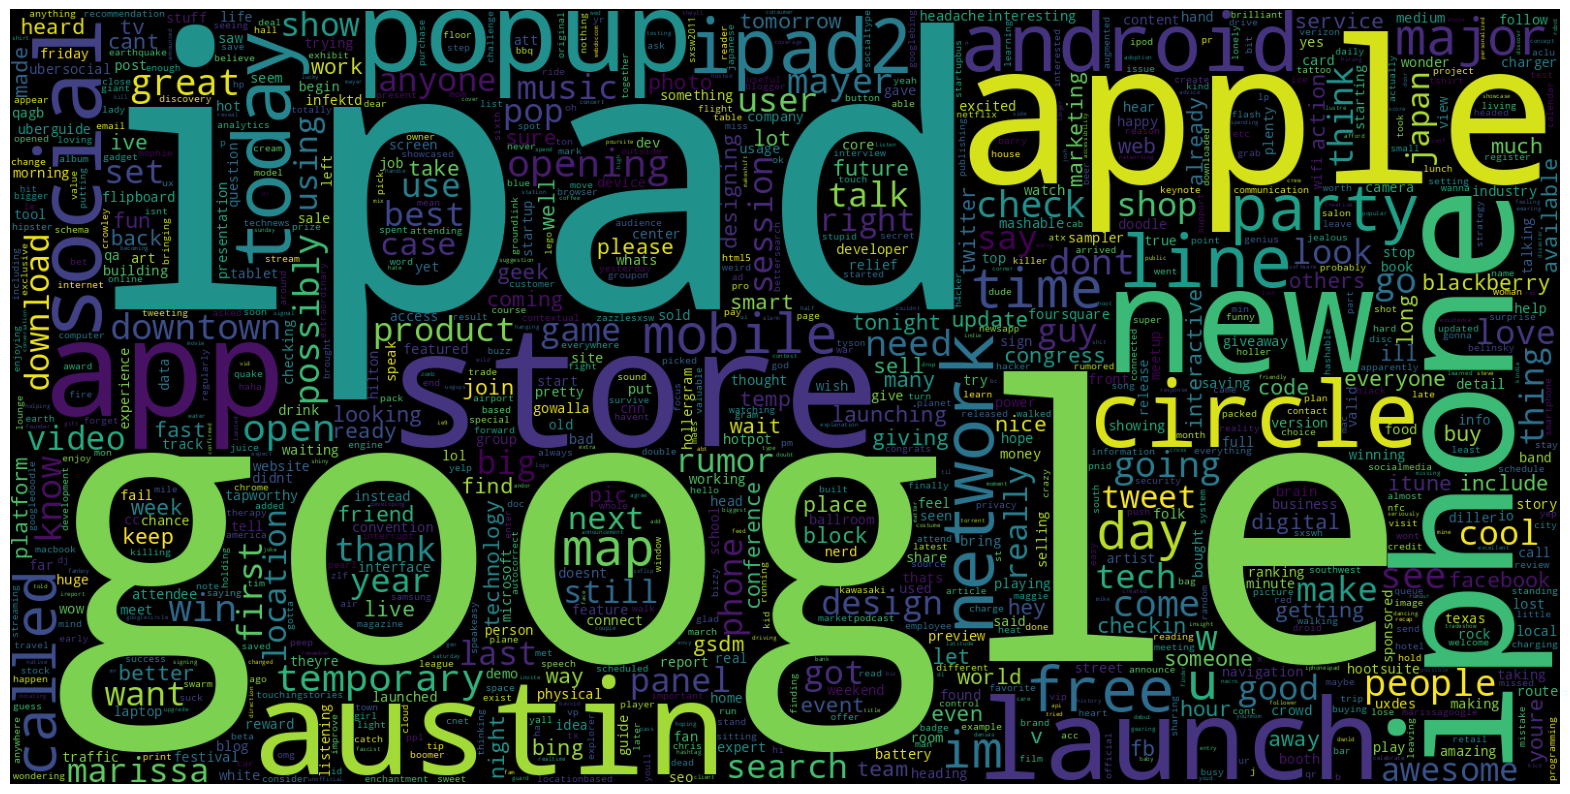

In [142]:
# !pip install wordcloud

from wordcloud import WordCloud

lemmatized_tweet = df['lemmatized_tweet']

# Flatten the list
flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

# Use all processed text directly
data_neg = flattened_lemmatized_tweet[:len(flattened_lemmatized_tweet)]

# Create the word cloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))

# Display the word cloud
plt.imshow(wc)
plt.axis('off')  # Hide axes
plt.show()

## 7.0 Modelling

### Preprocessing
Prepare data for modeling by:

- **Label Encoding:** Converted emotion labels into numerical values.
- **Vectorization:** Used TF-IDF and CountVectorizer to transform text data into numerical vectors.
- **SMOTE:** Applied SMOTE to handle class imbalance.
- **Train test split:** To split the data

**Benefits:**

These steps facilitate machine learning algorithms to process the emotion variable, convert text into a numerical format for better analysis, ensure the model is not biased towards the majority class, and provide clear metrics to evaluate performance on unseen data.

#### Label Encoding

In [143]:
# Classify the data
y = df['emotion']

# Label Enconde the target
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(y)
target[:5]

array([0, 2, 2, 0, 2])

In [144]:
# Confirm labels
label_encoder.classes_

array(['Negative emotion', 'Neutral emotion', 'Positive emotion'],
      dtype=object)


#### CountVectorizer

In [145]:
# Vectorization - CV
cv = CountVectorizer()

X_vec = cv.fit_transform(df['clean_tweet'])
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(cv.vocabulary_)
X_vec.set_index(y.index, inplace=True)
X_vec = X_vec.iloc[:, 160:]

In [146]:
# SMOTE - CV
smote = SMOTE()
X_cv_smote, y_cv_smote = smote.fit_resample(X_vec, target)

#### Train Test split - CV

In [147]:
# Train Test and split - CV
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv_smote, y_cv_smote, test_size=0.3, random_state=42)

#### TFIDF Vectorization

In [148]:
# Vectorization - TFIDF
tf = TfidfVectorizer()

X_tf = tf.fit_transform(df['clean_tweet'])
X_tf = pd.DataFrame.sparse.from_spmatrix(X_tf)
X_tf.columns = sorted(tf.vocabulary_)
X_tf.set_index(y.index, inplace=True)
X_tf = X_tf.iloc[:, 160:]

In [149]:
# SMOTE - TFIDF
X_tf_smote, y_tf_smote = smote.fit_resample(X_tf, target)

In [150]:
# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

### Models
The machine learning algorithims used in this section are:
- RandomForest
- Naive Bayes(MultinomialNB)
- LogisticRegression
- DecisionTrees

 We will use the split data to predict which model will achieve the highest accuracy and use it for deployment.

In [151]:
def modelling(model, cv=False, tf=False):
    if cv == True:
        # Fit the instantiated model
        model.fit(X_train_cv, y_train_cv)
        # Predict
        y_hat = model.predict(X_test_cv)
        # Results
        print("Count Vectorisation Results\n")
        print(f"Accuracy Score {round(accuracy_score(y_test_cv, y_hat), 3)}")
        # Classification Report
        print(classification_report(y_test_cv, y_hat))

    elif tf == True:
        # Fit the instantiated model
        model.fit(X_train_tf, y_train_tf)
        # Predict
        y_hat = model.predict(X_test_tf)
        # Results
        print("TFIDF Vectorisation Results\n")
        print(f"Accuracy Score {round(accuracy_score(y_test_tf, y_hat), 3)}")
        # Classification Report
        print(classification_report(y_test_tf, y_hat))

#### Model 1 - Multinomial Bayes - CV Data

In [ ]:
mnb = MultinomialNB()

In [ ]:
modelling(model=mnb, cv=True)

Count Vectorisation Results

Accuracy Score 0.63
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1541
           1       0.68      0.58      0.62      1523
           2       0.52      0.59      0.55      1500

    accuracy                           0.63      4564
   macro avg       0.64      0.63      0.63      4564
weighted avg       0.64      0.63      0.63      4564



In [ ]:
modelling(model=mnb, tf=True)

TFIDF Vectorisation Results

Accuracy Score 0.763
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1541
           1       0.73      0.59      0.65      1523
           2       0.70      0.74      0.72      1500

    accuracy                           0.76      4564
   macro avg       0.76      0.76      0.76      4564
weighted avg       0.76      0.76      0.76      4564



#### Hyperparameter Tuning the MNB Model

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# GridSearchCV for tuning
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tf, y_train_tf)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]}, scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
modelling(best_model, tf=True)

TFIDF Vectorisation Results

Accuracy Score 0.798
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1541
           1       0.76      0.64      0.69      1523
           2       0.72      0.77      0.74      1500

    accuracy                           0.80      4564
   macro avg       0.79      0.80      0.79      4564
weighted avg       0.79      0.80      0.79      4564



#### Model 2 - Random Forest

  Let's now work with the random forest model and look at its performance.
  
  Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model.

In [152]:
# Instantiate a random forest model
# Set `n_estimators = 1000` , `max_features = 5` and `max_depth = 5`
rf = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=5)

In [ ]:
modelling(model=rf, cv=True)
modelling(model=rf, tf=True)

Count Vectorisation Results

Accuracy Score 0.495
              precision    recall  f1-score   support

           0       0.92      0.19      0.32      1541
           1       0.73      0.43      0.54      1523
           2       0.39      0.87      0.54      1500

    accuracy                           0.49      4564
   macro avg       0.68      0.50      0.47      4564
weighted avg       0.68      0.49      0.47      4564

TFIDF Vectorisation Results

Accuracy Score 0.731
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1541
           1       0.79      0.44      0.56      1523
           2       0.57      0.89      0.70      1500

    accuracy                           0.73      4564
   macro avg       0.78      0.73      0.72      4564
weighted avg       0.78      0.73      0.73      4564



#### Hyperparameter tuning the Random Forest Classifier

In [153]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=12345)

# Define the parameter grid with the necessary hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]   # Maximum depth of the tree
}

# Perform grid search with 5-fold cross-validation for Count Vectorization
grid_search_rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_rf_cv.fit(X_train_cv, y_train_cv)

# Get the best model from grid search for Count Vectorization
best_rf_model_cv = grid_search_rf_cv.best_estimator_
print("Best Random Forest Model (Count Vectorization):", best_rf_model_cv)

# Predict on the test set using the best model for Count Vectorization
y_pred_cv = best_rf_model_cv.predict(X_test_cv)

# Calculate and print the accuracy for Count Vectorization
accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
print(f"Test Accuracy (Count Vectorization): {accuracy_cv:.3f}")

# Perform grid search with 5-fold cross-validation for TF-IDF Vectorization
grid_search_rf_tf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_rf_tf.fit(X_train_tf, y_train_tf)

# Get the best model from grid search for TF-IDF Vectorization
best_rf_model_tf = grid_search_rf_tf.best_estimator_
print("Best Random Forest Model (TF-IDF Vectorization):", best_rf_model_tf)

# Predict on the test set using the best model for TF-IDF Vectorization
y_pred_tf = best_rf_model_tf.predict(X_test_tf)

# Calculate and print the accuracy for TF-IDF Vectorization
accuracy_tf = accuracy_score(y_test_tf, y_pred_tf)
print(f"Test Accuracy (TF-IDF Vectorization): {accuracy_tf:.3f}")


Best Random Forest Model (Count Vectorization): RandomForestClassifier(n_estimators=200, random_state=12345)
Test Accuracy (Count Vectorization): 0.719
Best Random Forest Model (TF-IDF Vectorization): RandomForestClassifier(random_state=12345)
Test Accuracy (TF-IDF Vectorization): 0.833


#### Model 3 - Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=200)

In [ ]:
modelling(model=lr, cv=True)
modelling(model=lr, tf=True)

#### Hyperparameter Tuning Logistic Regression Model

In [154]:
# Parameter Tuning
c_space = np.linspace(28, 32, 4) # HATARI
max_iters = [100, 150, 200]
solvers = ["lbfgs", "liblinear"]
param_grid = { 'C': c_space, 'max_iter':max_iters }

In [155]:
# Applying the grid search
logreg_cv = GridSearchCV(lr, param_grid, cv=5)

In [158]:
# Testing the compiled model
modelling(logreg_cv, tf=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

TFIDF Vectorisation Results

Accuracy Score 0.832
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1541
           1       0.78      0.71      0.75      1523
           2       0.77      0.78      0.78      1500

    accuracy                           0.83      4564
   macro avg       0.83      0.83      0.83      4564
weighted avg       0.83      0.83      0.83      4564



In [159]:
lr_tune = LogisticRegression(max_iter=3000, C=100, solver='liblinear')
modelling(lr_tune, tf=True)

TFIDF Vectorisation Results

Accuracy Score 0.83
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1541
           1       0.78      0.70      0.74      1523
           2       0.76      0.79      0.77      1500

    accuracy                           0.83      4564
   macro avg       0.83      0.83      0.83      4564
weighted avg       0.83      0.83      0.83      4564



#### Model 4 - Decision Tree Model

In [160]:
dt = DecisionTreeClassifier(max_features=5)

In [161]:
modelling(dt, tf=True)

TFIDF Vectorisation Results

Accuracy Score 0.75
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1541
           1       0.66      0.66      0.66      1523
           2       0.68      0.65      0.67      1500

    accuracy                           0.75      4564
   macro avg       0.75      0.75      0.75      4564
weighted avg       0.75      0.75      0.75      4564



In [162]:
dt2 = DecisionTreeClassifier(max_depth=1000 , criterion='entropy', min_samples_split=4, min_samples_leaf=5)
modelling(dt2, tf=True)

TFIDF Vectorisation Results

Accuracy Score 0.726
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1541
           1       0.65      0.68      0.66      1523
           2       0.65      0.62      0.63      1500

    accuracy                           0.73      4564
   macro avg       0.73      0.72      0.72      4564
weighted avg       0.73      0.73      0.73      4564



## 8.0 Evaluation
We found the best model to be `The Random Forest model` with the highest accuracy of 83%

In [163]:
import pickle

In [164]:
pickle.dump(lr_tune, open('sentiment_model.pkl', 'wb'))